c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log10
c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log10


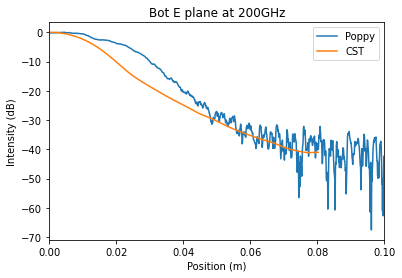

c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in log10
c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in log10


<Figure size 432x288 with 0 Axes>

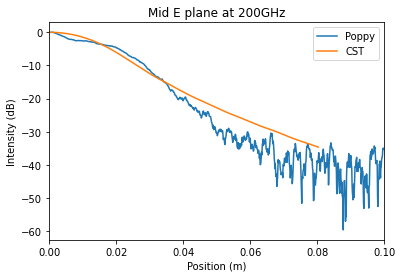

c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:76: RuntimeWarning: divide by zero encountered in log10
c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:77: RuntimeWarning: divide by zero encountered in log10


<Figure size 432x288 with 0 Axes>

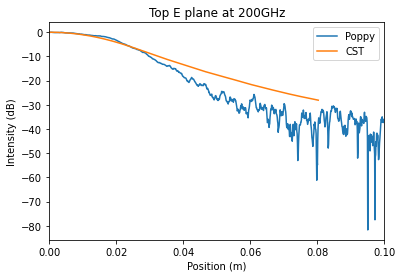

<Figure size 432x288 with 0 Axes>

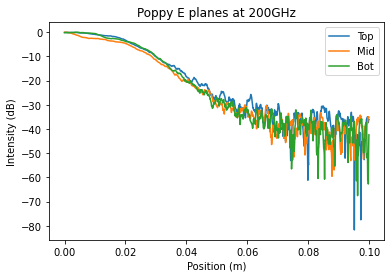

c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:100: RuntimeWarning: divide by zero encountered in log10
c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:101: RuntimeWarning: divide by zero encountered in log10
c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:104: RuntimeWarning: divide by zero encountered in log10
c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:105: RuntimeWarning: divide by zero encountered in log10
c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:108: RuntimeWarning: divide by zero encountered in log10
c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: divide by zero encountered in log10


<Figure size 432x288 with 0 Axes>

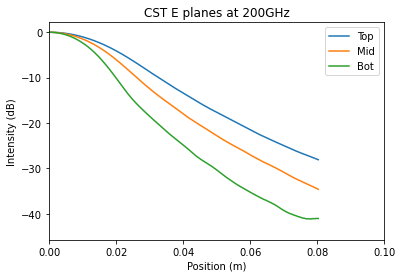

<Figure size 432x288 with 0 Axes>

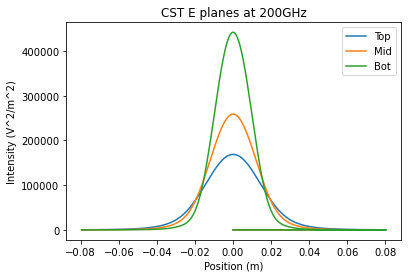

In [30]:
# From lens to tertiary in poppy @ 200GHz
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy import constants as const
import poppy

ylens=-49.840796
ybot=-27.8737
ymid=-18.8737
ytop=-9.8737
# separations 
d = [(ybot-ylens)*u.cm,(ymid-ybot)*u.cm,(ytop-ymid)*u.cm]

fwhm_ = np.sqrt(np.log(2)/297.4178) * u.m 
ff = 200 * u.GHz #ffs = [510 * u.GHz] # [480*u.GHz,540*u.GHz]

ll = const.c/ff

wf = poppy.FresnelWavefront(beam_radius=5*u.cm, wavelength=ll)
    
lenslet_aperture = poppy.GaussianAperture(fwhm=fwhm_)
wf *= lenslet_aperture

ring = poppy.CircularAperture(radius=0.0381*u.m)
wf *= ring # cold stop

wf.propagate_fresnel(d[0]) # propogate to bot
xpower=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeam_bot.txt')
xpos=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeampos_bot.txt')
y, x = wf.coordinates()
plt.figure(1)
plt.title("Bot E plane at 200GHz")
plt.xlabel("Position (m)")
plt.ylabel("Intensity (dB)")
temp=np.max(10*np.log10(wf.intensity[wf.intensity.shape[1]//2,1024:]))
pop_bot=10*np.log10(wf.intensity[wf.intensity.shape[1]//2,1024:])-temp
pop_botx=x[wf.intensity.shape[1]//2,1024:]
plt.plot(pop_botx, pop_bot,label='Poppy')
temp=np.max(10*np.log10(xpower))
plt.plot(xpos/100,10*np.log10(xpower)-temp,label='CST')
plt.xlim([0,0.1])
plt.legend()
plt.show()
plt.clf()

wf.propagate_fresnel(d[1]) # propogate to mid
xpower=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeam_mid.txt')
xpos=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeampos_mid.txt')
plt.figure(2)
plt.title("Mid E plane at 200GHz")
plt.xlabel("Position (m)")
plt.ylabel("Intensity (dB)")
temp=np.max(10*np.log10(wf.intensity[wf.intensity.shape[1]//2,1024:]))
pop_mid=10*np.log10(wf.intensity[wf.intensity.shape[1]//2,1024:])-temp
pop_midx=x[wf.intensity.shape[1]//2,1024:]
plt.plot(pop_midx, pop_mid,label='Poppy')
temp=np.max(10*np.log10(xpower))
plt.plot(xpos/100,10*np.log10(xpower)-temp,label='CST')
plt.xlim([0,0.1])
plt.legend()
plt.show()
plt.clf()

wf.propagate_fresnel(d[2]) # propogate to mid
xpower=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeam_top.txt')
xpos=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeampos_top.txt')
plt.figure(3)
plt.title("Top E plane at 200GHz")
plt.xlabel("Position (m)")
plt.ylabel("Intensity (dB)")
temp=np.max(10*np.log10(wf.intensity[wf.intensity.shape[1]//2,1024:]))
pop_top=10*np.log10(wf.intensity[wf.intensity.shape[1]//2,1024:])-temp
pop_topx=x[wf.intensity.shape[1]//2,1024:]
plt.plot(pop_topx, pop_top,label='Poppy')
temp=np.max(10*np.log10(xpower))
plt.plot(xpos/100,10*np.log10(xpower)-temp,label='CST')
plt.xlim([0,0.1])
plt.legend()
plt.show()
plt.clf()

plt.figure(4)                    
plt.title("Poppy E planes at 200GHz")
plt.xlabel("Position (m)")
plt.ylabel("Intensity (dB)")
plt.plot(pop_topx,pop_top,label='Top')
plt.plot(pop_midx,pop_mid,label='Mid')
plt.plot(pop_botx,pop_bot,label='Bot')                    
plt.legend()
plt.show()
plt.clf()
                    
plt.figure(5)                    
plt.title("CST E planes at 200GHz")
plt.xlabel("Position (m)")
plt.ylabel("Intensity (dB)")
xpower=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeam_top.txt')
xpos=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeampos_top.txt')
temp=np.max(10*np.log10(xpower))
plt.plot(xpos/100,10*np.log10(xpower)-temp,label='Top')
xpower=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeam_mid.txt')
xpos=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeampos_mid.txt')
temp=np.max(10*np.log10(xpower))
plt.plot(xpos/100,10*np.log10(xpower)-temp,label='Mid')                 
xpower=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeam_bot.txt')
xpos=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeampos_bot.txt')
temp=np.max(10*np.log10(xpower))
plt.plot(xpos/100,10*np.log10(xpower)-temp,label='Bot')                  
plt.legend()  
plt.xlim([0,0.1])
plt.show()                    
plt.clf()


plt.figure(6)                    
plt.title("CST E planes at 200GHz")
plt.xlabel("Position (m)")
plt.ylabel("Intensity (V^2/m^2)")
xpower=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeam_top.txt')
xpos=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeampos_top.txt')
plt.plot(xpos/100,xpower,label='Top')
xpower=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeam_mid.txt')
xpos=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeampos_mid.txt')
plt.plot(xpos/100,xpower,label='Mid')                 
xpower=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeam_bot.txt')
xpos=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeampos_bot.txt')
plt.plot(xpos/100,xpower,label='Bot')                  
plt.legend()  
#plt.xlim([0,0.1])
plt.show()  

                    

---Fitting peak amplitude of gaussians---
From the fit: w0=0.007587932689479407m
Fit's amplitude: c=12.884249188094708 in V/m

---Fitting to the width of each gaussian individually---
The roots of the polynomials are as follows:
[-0.04980816+0.j          0.02490408+0.03852419j  0.02490408-0.03852419j]
[-0.05705033+0.j          0.02852516+0.04214518j  0.02852516-0.04214518j]
[-0.06356108+0.j          0.03178054+0.04461178j  0.03178054-0.04461178j]


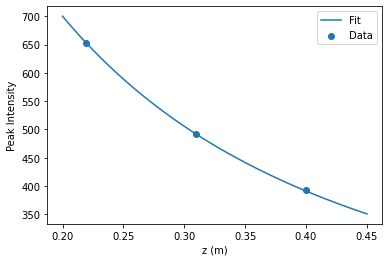

In [193]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import sys
from astropy import constants as const
from scipy.optimize import curve_fit

def func(x, *params):
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        ctr = params[i]
        amp = params[i+1]
        wid = params[i+2]
        y = y + amp * np.exp( -((x - ctr)/wid)**2)
    return y

plt.title("CST E planes at 200GHz")
plt.xlabel("Position (m)")
plt.ylabel("Intensity ($V/m$)")
xpower=np.sqrt(np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeam_top.txt'))
xpos=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeampos_top.txt')
xpos=xpos/100
plt.plot(xpos,xpower,label='Top')
guess = [0, 15, 0.02]
popt_top, pcov = curve_fit(func, xpos, xpower, p0=guess, bounds=((-0.1, 1, 0), (0.1, 2500, 1)))
#print(popt_top)
xpower=np.sqrt(np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeam_mid.txt'))
xpos=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeampos_mid.txt')
xpos=xpos/100
plt.plot(xpos,xpower,label='Mid')
guess = [0, 25, 0.02]
popt_mid, pcov = curve_fit(func, xpos, xpower, p0=guess, bounds=((-0.1, 1, 0), (0.1, 3000, 1)))
#print(popt_mid)
xpower=np.sqrt(np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeam_bot.txt'))
xpos=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeampos_bot.txt')
xpos=xpos/100
plt.plot(xpos,xpower,label='Bot')
guess = [0, 45, 0.02]
popt_bot, pcov = curve_fit(func, xpos, xpower, p0=guess, bounds=((-0.1, 1, 0), (0.1, 5000, 1)))
#print(popt_bot)
plt.legend()  
#plt.xlim([0,0.1])
#plt.show()  
plt.clf()

u_0=[popt_bot[1], popt_mid[1], popt_top[1]]
ylens=-49.840796/100
ybot=-27.8737/100
ymid=-18.8737/100
ytop=-9.8737/100
# separations 
z = [ybot-ylens,ymid-ylens,ytop-ylens] # in meters
ff = 200 * u.GHz
ll = const.c/ff
ll=ll.to(u.m).value # converted to m

def w0func(z, *params):
    u = np.zeros_like(z)
    ll=0.14989622900000002/100 # wavelength in m when freq=200GHz 
    w_0=params[0]
    c=params[1]
    for it in range(0, len(z)-1):
        w = w_0*np.sqrt(1+(ll*z[it]/math.pi/w_0**2)**2)
        u[it] = c*np.sqrt(2/math.pi)/w
    return u

guess=[1, 100]

popt, pcov = curve_fit(w0func, z, u_0, p0=guess, bounds=((0, 0), (100, 1000)))

print('---Fitting peak amplitude of gaussians---')
print(f"From the fit: w0={float(popt[0])}m")
print(f"Fit's amplitude: c={popt[1]} in V/m")

plt.figure(1)
plt.scatter(z,u_0,label='Data')
x=np.linspace(0.20,0.45)
y=np.zeros_like(x)
for it in range(0, len(x)):
    y[it] = popt[1]*np.sqrt(2/math.pi)/(popt[0]*np.sqrt(1+(ll*x[it]/math.pi/popt[0]**2)**2))
    
plt.plot(x,y,label='Fit')
plt.legend()
plt.xlabel('z (m)')
plt.ylabel('Peak Intensity')

wids=[popt_bot[2], popt_mid[2], popt_top[2]] # w fits from gaussian widths
print("")
print("---Fitting to the width of each gaussian individually---")
print("The roots of the polynomials are as follows:")
for it in np.arange(0,3):
    p=[1, 0, -wids[it]**2, ll*z[it]/math.pi]
    print(np.roots(p)) # the first roots are the only real ones, so their abs value is w_0?

Fit w_0=3.6582519633343422e-06, and amplitude=15.883173503149033
[[1.09263894e-16 2.38244467e-10]
 [2.38244467e-10 1.53789093e-03]]


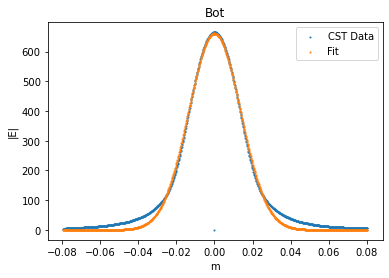

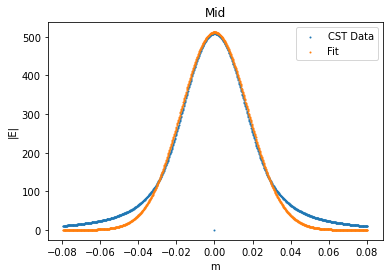

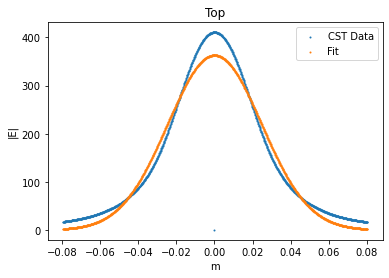

<Figure size 432x288 with 0 Axes>

In [180]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import sys
from astropy import constants as const
from scipy.optimize import curve_fit

def func(x, *params):
    ll=0.14989622900000002/100 # wavelength in m when freq=200GHz 
    ylens=-49.840796/100
    ybot=-27.8737/100
    ymid=-18.8737/100
    ytop=-9.8737/100
    #z = [ybot-ylens,ymid-ylens,ytop-ylens] # in meters
    z = [ytop-ylens,ymid-ylens,ybot-ylens] #lets flip the order as a test
    
    w_0 = params[0]     
    amp = params[1]
    
    y = np.zeros_like(x)
    for it in np.arange(0,3):
        w=1/(w_0*np.sqrt(1+(ll*z[it]/math.pi/w_0**2)**2))
        y[995*it:995*(it+1)]=amp*np.sqrt(2/math.pi)/w*np.exp(-(x[995*it:995*(it+1)]/w)**2)
    return y

x=np.zeros(995*3)
power=np.zeros(995*3)

power[0:995*1]=np.sqrt(np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeam_bot.txt'))
x[0:995*1]=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeampos_bot.txt')/100

power[995*1:995*2]=np.sqrt(np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeam_mid.txt'))
x[995*1:995*2]=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeampos_mid.txt')/100

power[995*2:995*3]=np.sqrt(np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeam_top.txt'))
x[995*2:995*3]=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeampos_top.txt')/100

guess=[0.01, 15]

popt, pcov = curve_fit(func, x, power, p0=guess, bounds=((0, 0), (1, 100)))

print(f"Fit w_0={popt[0]}, and amplitude={popt[1]}")
print(pcov)
t=["Bot", "Mid", "Top"]
y=func(x,popt[0], popt[1])
for it in np.arange(0,3):
    plt.scatter(x[995*it:995*(it+1)],power[995*it:995*(it+1)],1,label="CST Data")
    plt.scatter(x[995*it:995*(it+1)],y[995*it:995*(it+1)],1,label="Fit")
    plt.title(t[it])
    plt.xlabel('m')
    plt.ylabel('|E|')
    plt.legend()
    plt.savefig(t[it]+"_Fit.png")
    plt.show()
    plt.clf()

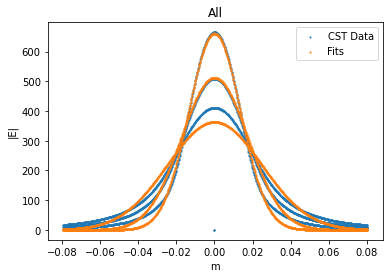

In [174]:
plt.scatter(x,power,1,label="CST Data")
plt.scatter(x,y,1,label="Fits")
plt.title("All")
plt.xlabel('m')
plt.ylabel('|E|')
plt.legend()
plt.show()